# 项目描述
**你的目标：**
清洗 WeRateDogs 推特数据，创建有趣可靠的分析和可视化。推特档案很大，但是只包括基本的推特信息。对 "Wow!" 进行收集、评估和清洗，是分析和可视化应该做的。

**你在这个项目中的任务如下：**
* 清洗数据包括：
    * 收集数据
    * 评估数据
    * 清洗数据
* 对清洗过的数据进行储存、分析和可视化
* 汇报 1) 你的数据清洗过程 和 2) 你的数据分析和可视化

# 项目目的

## Uda目标

### 收集数据
* 学员能够从各种来源和文件格式中收集数据
    - （DONE）在“项目详细信息”页面上使用至少三（3）个不同来源。
    - （DONE）在“项目详细信息”页面上，使用至少三（3）种不同的文件格式。首先将每一条数据导入到一个单独的 pandas 数据框中。

### 评估数据
* 学员能够以可视化和编程方式评估数据的质量和整洁度。
    - （DONE）可视化评估：每张收集的数据都显示在 Jupyter Notebook 中，以便进行可视化评估。 一旦显示出来，数据可以在外部应用程序（如 Excel，文本编辑器）中进行评估。
    - （DONE）编程评估：使用 pandas 的功能和/或方法来评估数据。
* 学员能够彻底对数据集进行评估
    - （DONE）学员能够检测到至少 八（8）个数据质量问题和两（2）个整洁度问题，包括待清理问题以满足项目要求。每一个问题用一到几句话记录下来。

### 清理数据
* 学员根据数据清理过程中的步骤来逐步完成他们的清理工作
    - （DONE）清理过程中的定义，编码和测试步骤都有明确的记录。
* 学员能够使用编程方式彻底清理数据集
    - （DONE）在清理之前，保存原始数据的副本。
    - （DONE）评估阶段确定的所有问题都可以通过 Python 和 pandas 成功清理，并包括满足项目要求所需的清理任务。
    - （DONE）学员需要创建一个整洁的主数据集（或者多个数据集，如果有必要的话）与所有收集的数据片段。

### 存储并处理清洁过的数据
* 学员能够存储已经收集、评估并清理过的数据集
    - （DONE）学员将他们收集、评估和清理过的主数据集保存到 CSV 文件或 SQLite 数据库中。
* 学生能够根据自己所掌握的数据采取行动来得出结论（例如通过分析，可视化和/或模型)
    - （DONE）使用 Jupyter Notebook 中的 pandas 或 SQL 分析主数据集，并生成至少三（3）个独立的结论。
    - （DONE）在 Jupyter Notebook 中，使用 Python 绘图库或在 Tableau 中至少生成一（1）个标记的可视化对象。
    - （DONE）学员必须在他们的清洗数据中明确他们之后分析和可视化所依据的数据是建立在评估和清理的基础上。

### 报告
* 学员能够思考并描述他们的数据清洗过程
    - （DONE）学员需要言简意赅地介绍他们的数据清理。 这一文件（wrangle_report.pdf）大约只需要300-600字。
* 学员在他们清洗过的数据集中能够发现并描述出结论
    - （DONE）学员发现至少三（3）个结论，其中至少包含一个（1）可视化。这一文件（act_report.pdf）至少需要 250 个字。

### 项目文件
* 学员提交的文件夹中是否包含所有必需的文件
    - （DONE）wrangle_act.ipynb
    - （DONE）wrangle_report.pdf
    - （DONE）act_report.pdf
    - （DONE）并包括所有的数据集文件，如存储的主数据集，并使用在项目提交页面中指定的文件名和扩展名。   

## 个人期望结论假设
* 评分高低应该和转发数量/喜爱程度存在关系
* 评分高低和狗的种类存在关系
* 评分高低和狗的地位存在关系
* 评论的词云分析
* 各种评分的箱形分布图
* 评分的总体分布情况

**所以需要完成tweet-archive-master文档应包含以下内容，相应数据来源在括号中标识：**
* tweet_id 推特账号 （df_tweeter）
* text 推文（df_tweeter）
* timestamp 时间戳（df_tweeter）
* retweet-count 转推数（df_json）
* favorite-count 喜爱数 （df_json）
* rating 评分（df_tweeter）
* dog-name 狗名（df_tweeter）
* dog-status 狗的地位（df_tweeter）
* dog-types 狗的品种(df_pred)
* dog-prediction probabily 品种预测的概率(df_pred)



In [198]:
# 导入所需模块
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import os
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt
import re
import statsmodels.formula.api as smf
%matplotlib inline
%config InlineBackend.figure_format='retina'
#import wordcloud

# 收集数据
## 下载数据

In [2]:
# 下载image_predictions.tsv数据
url1 = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv'
with open('image_predictions.tsv' , 'wb') as file:
    image_f = requests.get(url1)
    file.write(image_f.content)
image_predictions = pd.read_csv('image_predictions.tsv' , sep = '\t') 
#image_predictions.head(5)

In [3]:
# 下载twitter-archive-enhanced.csv数据
url2 = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/twitter-archive-enhanced.csv'
with open('twitter-archive-enhanced.csv' , 'wb') as file:
    twitter_f = requests.get(url2)
    file.write(twitter_f.content)
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv' , sep = ',') 
#twitter_archive_enhanced.head(5)

In [4]:
# 由于众所周知的原因，无法注册tweeter，好在udacity准备了相关json数据的TXT格式以应用该project，下载tweet_json.txt数据
url3 = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/tweet_json.txt'

with open('tweet_json.txt' , 'wb') as file:
    tweet_f = requests.get(url3)
    file.write(tweet_f.content)
#test = open('tweet_json.txt' , 'r')
#a = test.readlines()
#a

tweet_data = pd.DataFrame(columns=['tweet_id','retweet_count','favorite_count'])
with open('tweet_json.txt','r')as file:
    for line in file.readlines():
        dic = json.loads(line)
        #print(dic['id'])
        tweet_id = dic['id']
        retweet_count = dic['retweet_count']
        favorite_count = dic['favorite_count']
        tweet_data = tweet_data.append({'tweet_id' :tweet_id,'retweet_count':retweet_count,'favorite_count':favorite_count},ignore_index=True)
#tweet_data.head(5)


In [5]:
#读取备份文件进行操作
df_pred= image_predictions.copy()
df_twitter = twitter_archive_enhanced.copy()
df_json = tweet_data.copy()

# 评估数据
分别对于df_twitter, df_pred, df_json三个数据集进行检查

## df_twitter数据集的检查

In [6]:
df_twitter

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [7]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
#由于狗的地位只能有一种，观察发现部分数据狗的种类有重复分类现象，通过编程评估的方法进行筛选，得出存在重复标注现象的tweet_id如下：
temp = df_twitter.drop(['in_reply_to_status_id','in_reply_to_user_id','timestamp','source','text','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls','rating_numerator','rating_denominator','name'],axis=1)
#temp
temp_dog = pd.melt(temp, id_vars=["tweet_id"], value_vars=["doggo","floofer","pupper","puppo"])
#temp_dog
temp_dog = temp_dog[temp_dog.value!='None']
temp_dog = temp_dog.drop(['variable'],axis=1)
a = temp_dog.drop_duplicates(subset=['tweet_id'],keep='first')
b = temp_dog.drop_duplicates(subset=['tweet_id'],keep=False)
dupl_dog = a.append(b).drop_duplicates(subset=['tweet_id'],keep=False)
dupl_dog_list = list(dupl_dog.tweet_id)
dupl_dog.tweet_id

191     855851453814013952
200     854010172552949760
460     817777686764523521
531     808106460588765185
565     802265048156610565
575     801115127852503040
705     785639753186217984
733     781308096455073793
778     775898661951791106
822     770093767776997377
889     759793422261743616
956     751583847268179968
1063    741067306818797568
1113    733109485275860992
Name: tweet_id, dtype: int64

In [9]:
#缺少狗的地位的部分数据
none_list = temp['tweet_id'][(temp.doggo == 'None') & (temp.floofer == 'None') & (temp.pupper == 'None') & (temp.puppo =='None')]
none_list

0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
5       891087950875897856
6       890971913173991426
7       890729181411237888
8       890609185150312448
10      890006608113172480
11      889880896479866881
13      889638837579907072
15      889278841981685760
16      888917238123831296
17      888804989199671297
18      888554962724278272
19      888202515573088257
20      888078434458587136
21      887705289381826560
22      887517139158093824
23      887473957103951883
24      887343217045368832
25      887101392804085760
26      886983233522544640
27      886736880519319552
28      886680336477933568
30      886267009285017600
31      886258384151887873
32      886054160059072513
33      885984800019947520
               ...        
2326    666411507551481857
2327    666407126856765440
2328    666396247373291520
2329    666373753744588802
2330    666362758909284353
2331    666353288456101888
2

In [10]:
#采用编程检查的方法评估数据
temp_dog.value.value_counts()
df_twitter.name.value_counts()
df_twitter.rating_numerator.value_counts()
df_twitter.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [11]:
df_twitter.text.sample(20)

51      This is Alfy. You're witnessing his first wate...
1985    This is Cheryl AKA Queen Pupper of the Skies. ...
2153    This is a brave dog. Excellent free climber. T...
1109    This is Terry. The harder you hug him the fart...
1122    This is Rooney. He can't comprehend glass. 10/...
1427    Pls make sure ur dogs have gone through some b...
1132    When you're way too slow for the "down low" po...
1784    In honor of the new Star Wars movie. Here's Yo...
635     This is Dobby. I can't stop looking at her fee...
587     This is Sobe. She's a h*ckin happy doggo. Only...
1841    Ok, I'll admit this is a pretty adorable bunny...
290                                    @markhoppus 182/10
1772    Another spooky pupper here. Most definitely fl...
910     This is Cooper. He tries to come across as fei...
1149    This is Bloop. He's a Phoenician Winnebago. To...
1908    Meet Bailey. She plays with her food. Very chi...
2349    This is an odd dog. Hard on the outside but lo...
2198    This i

- **tweet_id的类型为int64，in_reply_to_status_id & in_reply_to_user_id 的类型为64位浮点，实际上这列不需要进行计算，我们需要将所有的ID列都转化为字符串格式**（Q）
- **timestamp时间戳的数据格式为object，应当转换为timedate** (Q)
- **部分name列信息缺失，需要补全狗的名字，同时部分狗的名字提取不正确** (Q)
- **狗的种类缺失** (Q)
- **狗的种类有重复标注现象** (Q)
- **expanded_urls只有2297 non-null object，相比表格的2356行缺失数据，需要补全** (Q)
- **狗的分类用了四列，应该合为一列**（T）
- **缺失retweeted_count 和 favorite_count 需要从df_json文件中提取增加**（Q）
- **source列的信息没有用，需要删除**（T）
- **部分Rating评分的分值不正确**（Q）
- **为了后续统计分析不受影响，所有缺失的数据应该被标记为np.nan的逻辑形式，而不是'None'的字符串形式**（Q）



## df_pred数据集的检查

In [12]:
df_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [13]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
#筛选出不是狗狗的部分
df_pred['tweet_id'][(df_pred.p1_dog==False) & (df_pred.p2_dog==False) & (df_pred.p3_dog==False)]

6       666051853826850816
17      666104133288665088
18      666268910803644416
21      666293911632134144
25      666362758909284353
29      666411507551481857
45      666786068205871104
50      666837028449972224
51      666983947667116034
53      667012601033924608
56      667065535570550784
69      667188689915760640
73      667369227918143488
77      667437278097252352
78      667443425659232256
93      667549055577362432
94      667550882905632768
96      667724302356258817
98      667766675769573376
100     667782464991965184
106     667866724293877760
107     667873844930215936
112     667911425562669056
115     667937095915278337
117     668142349051129856
118     668154635664932864
123     668226093875376128
130     668291999406125056
132     668466899341221888
140     668544745690562560
               ...        
1839    837482249356513284
1844    838916489579200512
1847    839290600511926273
1851    840370681858686976
1853    840696689258311684
1869    844580511645339650
1

- **tweet_id 和 img_num的类型为int64，实际上这列不需要进行计算，我们需要将这两列都转化为字符串格式**（Q）

## df_json数据集的检查

In [15]:
df_json

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8842,39492
1,892177421306343426,6480,33786
2,891815181378084864,4301,25445
3,891689557279858688,8925,42863
4,891327558926688256,9721,41016
5,891087950875897856,3240,20548
6,890971913173991426,2142,12053
7,890729181411237888,19548,66596
8,890609185150312448,4403,28187
9,890240255349198849,7684,32467


In [16]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 3 columns):
tweet_id          2352 non-null object
retweet_count     2352 non-null object
favorite_count    2352 non-null object
dtypes: object(3)
memory usage: 55.2+ KB


- **转帖数和喜爱数的类型应为int64**（Q）

## 问题汇总：

#### 数据完整性问题
##### df_twitter
* Done C1_缺失`retweeted_count` 和 `favorite_count` 需要从`df_json`文件中提取增加
* Done C2_狗的品种缺失需要从`df_pred`中提取补全

#### 数据质量问题
##### df_twitter
* Done Q1_部分`name`列信息缺失，需要补全狗的名字，同时部分狗的名字提取不正确
* Done Q2_`tweet_id`的类型为int64，`in_reply_to_status_id` & `in_reply_to_user_id` 的类型为64位浮点，实际上这列不需要进行计算，我们需要将所有的ID列都转化为字符串格式
* Done Q3_`timestamp`时间戳的数据格式为object，应当转换为timedate
* Done Q4_狗的地位有重复标注现象，需要进行更正
* Done Q5_部分Rating评分的分值不正确
* Done Q6_为了后续统计分析不受影响，所有缺失的数据应该被标记为np.nan的逻辑形式，而不是'None'的字符串形式

##### df_pred
* Done Q7_`tweet_id` 和 `img_num`的类型为int64，实际上这列不需要进行计算，我们需要将这两列都转化为字符串格式

##### df_json
* Done Q8_`retweet_count`&`favorite_count`的类型应为int64

#### 数据整洁度问题
##### df_twitter
* Done T1_`source`,`expanded_urls`,`in_reply_to_status_id`,`in_reply_to_user_id`,`retweeted_status_id`,`retweeted_status_user_id`,`retweeted_status_timestamp`列的信息没有用，需要删除
* Done T2_狗的地位用了四列，应该合为一列



# 清洗数据
## 添加缺失数据 & 清理无用数据

### 定义
C1_缺失`retweeted_count` 和 `favorite_count` 需要从`df_json`文件中提取增加

### 代码

In [17]:
df_twitter_clean = pd.merge(df_twitter, df_json, how='left', on='tweet_id')

### 测试

In [18]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 19 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
retweet_count                 2

### 定义
 T1_`source`,`expanded_urls`,`in_reply_to_status_id`,`in_reply_to_user_id`,`retweeted_status_id`,`retweeted_status_user_id`,`retweeted_status_timestamp`列的信息没有用，需要删除

### 代码

In [19]:
df_twitter_clean.drop(['source','expanded_urls','in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1, inplace = True)

### 测试

In [20]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
retweet_count         2352 non-null object
favorite_count        2352 non-null object
dtypes: int64(2), object(10)
memory usage: 239.3+ KB


### 定义
C2_狗的品种缺失预测需要从df_pred中提取补全

### 代码

In [21]:
df_pred_clean = df_pred.copy()
df_pred_clean.drop(['jpg_url','img_num'],axis = 1, inplace = True)
df_twitter_clean = pd.merge(df_twitter_clean, df_pred_clean, how='left', on='tweet_id')

### 测试

In [22]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 21 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
retweet_count         2352 non-null object
favorite_count        2352 non-null object
p1                    2075 non-null object
p1_conf               2075 non-null float64
p1_dog                2075 non-null object
p2                    2075 non-null object
p2_conf               2075 non-null float64
p2_dog                2075 non-null object
p3                    2075 non-null object
p3_conf               2075 non-null float64
p3_dog                2075 non-n

### 定义
T2_狗的地位用了四列，应该合为一列

Q4_狗的地位有重复标注现象，需要进行更正

### 代码

In [23]:
#扫描text文档，填充狗的地位
df_twitter_clean['type'] = 'None'
dog_lists = ['pupper', 'puppo', 'doggo', 'floofer']
for i in range(0,len(df_twitter_clean)):
    text = df_twitter_clean.text[i]
    for dog_status in dog_lists:
        if dog_status in text:
            df_twitter_clean.type[i] = dog_status
df_twitter_clean

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,type
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,None
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,None
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,None
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,None
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,None
5,891087950875897856,2017-07-29 00:08:17 +0000,Here we have a majestic great white breaching ...,13,10,None,None,None,None,None,...,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,None
6,890971913173991426,2017-07-28 16:27:12 +0000,Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,None,None,None,None,...,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,None
7,890729181411237888,2017-07-28 00:22:40 +0000,When you watch your owner call another dog a g...,13,10,None,None,None,None,None,...,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,None
8,890609185150312448,2017-07-27 16:25:51 +0000,This is Zoey. She doesn't want to be one of th...,13,10,Zoey,None,None,None,None,...,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,None
9,890240255349198849,2017-07-26 15:59:51 +0000,This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo,None,None,None,...,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,doggo


In [24]:
none_list = df_twitter_clean['tweet_id'][(df_twitter_clean.doggo == 'None') & (df_twitter_clean.floofer == 'None') & (df_twitter_clean.pupper == 'None') & (df_twitter_clean.puppo =='None')]
none_dog_list = list(none_list)
len(none_dog_list)

1976

In [25]:
#筛选出有重复标记的数据段
with pd.option_context('max_colwidth', 200):
    display(df_twitter_clean[df_twitter_clean['tweet_id'].isin(dupl_dog_list)][['tweet_id','name','text','doggo','floofer','pupper','puppo']])

,tweet_id,name,text,doggo,floofer,pupper,puppo
191,855851453814013952,None,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,doggo,None,None,puppo
200,854010172552949760,None,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",doggo,floofer,None,None
460,817777686764523521,Dido,"This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",doggo,None,pupper,None
531,808106460588765185,None,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,doggo,None,pupper,None
565,802265048156610565,None,"Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",doggo,None,pupper,None
575,801115127852503040,Bones,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,doggo,None,pupper,None
705,785639753186217984,Pinot,This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,doggo,None,pupper,None
733,781308096455073793,None,"Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",doggo,None,pupper,None
778,775898661951791106,None,"RT @dog_rates: Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",doggo,None,pupper,None
822,770093767776997377,just,RT @dog_rates: This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,doggo,None,pupper,None


In [26]:
#with pd.option_context('max_colwidth', 200):
    #display(df_twitter_clean[df_twitter_clean['tweet_id'].isin(none_dog_list)][['tweet_id','text','doggo','floofer','pupper','puppo']])

In [27]:
#df_twitter_clean[df_twitter_clean['tweet_id'].isin(dupl_dog_list)].index

In [28]:
with pd.option_context('max_colwidth', 200):
    display(df_pred[df_pred['tweet_id'].isin(dupl_dog_list)][['tweet_id','jpg_url','p1_dog','p2_dog','p3_dog']])

,tweet_id,jpg_url,p1_dog,p2_dog,p3_dog
1155,733109485275860992,https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg,True,True,False
1201,741067306818797568,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,True,True,True
1292,751583847268179968,https://pbs.twimg.com/media/Cm4phTpWcAAgLsr.jpg,True,False,False
1350,759793422261743616,https://pbs.twimg.com/media/CotUFZEWcAA2Pku.jpg,True,True,True
1407,770093767776997377,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,True,True,True
1446,775898661951791106,https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg,True,True,False
1507,785639753186217984,https://pbs.twimg.com/media/CucnLmeWAAALOSC.jpg,False,False,False
1609,801115127852503040,https://pbs.twimg.com/media/Cx4h7zHUsAAqaJd.jpg,True,True,True
1616,802265048156610565,https://pbs.twimg.com/media/CyI3zXgWEAACQfB.jpg,True,True,True
1644,808106460588765185,https://pbs.twimg.com/media/Czb4iFRXgAIUMiN.jpg,True,True,True


In [29]:
#根据对于text内信息的描述，以及df_pre中的图像和预测，调整更正重复标注的字段
#经过分析发现以下重复的原因有四类：
#第一类：标注提取错误：855851453814013952，854010172552949760，817777686764523521，801115127852503040，删除doggo
#第二类 标注提取错误：751583847268179968 删除pupper
#第三类：不是狗：785639753186217984，删除pupper & doggo
#第四类：两只狗，通常为亲子，存在两种地位，认为没有错误。

df_twitter_clean.loc[(df_twitter_clean.tweet_id == 855851453814013952),'doggo'] = 'None'
df_twitter_clean.loc[(df_twitter_clean.tweet_id == 854010172552949760),'doggo'] = 'None'
df_twitter_clean.loc[(df_twitter_clean.tweet_id == 817777686764523521),'doggo'] = 'None'
df_twitter_clean.loc[(df_twitter_clean.tweet_id == 801115127852503040),'doggo'] = 'None'
df_twitter_clean.loc[(df_twitter_clean.tweet_id == 751583847268179968),'pupper'] = 'None'
df_twitter_clean.loc[(df_twitter_clean.tweet_id == 785639753186217984),('doggo','pupper')] = 'None'

with pd.option_context('max_colwidth', 200):
    display(df_twitter_clean[df_twitter_clean['tweet_id'].isin(dupl_dog_list)][['tweet_id','doggo','floofer','pupper','puppo']])

,tweet_id,doggo,floofer,pupper,puppo
191,855851453814013952,None,None,None,puppo
200,854010172552949760,None,floofer,None,None
460,817777686764523521,None,None,pupper,None
531,808106460588765185,doggo,None,pupper,None
565,802265048156610565,doggo,None,pupper,None
575,801115127852503040,None,None,pupper,None
705,785639753186217984,None,None,None,None
733,781308096455073793,doggo,None,pupper,None
778,775898661951791106,doggo,None,pupper,None
822,770093767776997377,doggo,None,pupper,None


In [30]:
df_twitter_clean['dog_status'] = 'None'
for i in range(0,len(df_twitter_clean)):
    if df_twitter_clean.doggo[i] != 'None':
        df_twitter_clean.dog_status[i] = 'doggo'
    elif df_twitter_clean.floofer[i] != 'None':
        df_twitter_clean.dog_status[i] = 'floofer'
    elif df_twitter_clean.pupper[i] != 'None':
        df_twitter_clean.dog_status[i] = 'pupper'
    elif df_twitter_clean.puppo[i] != 'None':
        df_twitter_clean.dog_status[i] = 'puppo'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: Sett

In [31]:
#df_twitter_clean

In [32]:
df_twitter_clean.type = df_twitter_clean.type.replace('None','')
df_twitter_clean.dog_status = df_twitter_clean.dog_status.replace('None','')

In [33]:
df_twitter_clean.type.value_counts()

           1957
pupper      262
doggo        98
puppo        35
floofer       4
Name: type, dtype: int64

In [34]:
df_twitter_clean.dog_status.value_counts()
#df_twitter_clean.dog_status

           1977
pupper      247
doggo        92
puppo        30
floofer      10
Name: dog_status, dtype: int64

In [35]:
# 整合我提取的type数据和源文件提供的dog_status数据到status
df_twitter_clean['status'] = ''
for i in range(0,len(df_twitter_clean)):
    if df_twitter_clean.type[i] != '':
        if df_twitter_clean.dog_status[i] != '':
            if df_twitter_clean.dog_status[i] == df_twitter_clean.type[i]:
                df_twitter_clean.status[i] = df_twitter_clean.type[i]
            else: df_twitter_clean.status[i] = 'needcheck'   
    else: df_twitter_clean.status[i] = df_twitter_clean.type[i] + df_twitter_clean.dog_status[i]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [36]:
#整理后发现dog_status还有部分数据和我自己通过text提取出的数据type不一致，经过观察发现，是由于大写字母没有考虑导致，dog_status的数据为正确数据。
with pd.option_context('max_colwidth', 200):
    display(df_twitter_clean[(df_twitter_clean['status']=='needcheck')][['tweet_id','status','type','dog_status','text']])

,tweet_id,status,type,dog_status,text
191,855851453814013952,needcheck,doggo,puppo,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel
200,854010172552949760,needcheck,doggo,floofer,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk"
460,817777686764523521,needcheck,doggo,pupper,"This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7"
575,801115127852503040,needcheck,doggo,pupper,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj


In [37]:
#观察发现dog_status是正确的，手动添加到status字段
df_twitter_clean.loc[(df_twitter_clean.tweet_id == 855851453814013952),'status'] = 'puppo'
df_twitter_clean.loc[(df_twitter_clean.tweet_id == 854010172552949760),'status'] = 'floofer'
df_twitter_clean.loc[(df_twitter_clean.tweet_id == 817777686764523521),'status'] = 'puppo'
df_twitter_clean.loc[(df_twitter_clean.tweet_id == 801115127852503040),'status'] = 'puppo'

In [38]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
retweet_count         2352 non-null object
favorite_count        2352 non-null object
p1                    2075 non-null object
p1_conf               2075 non-null float64
p1_dog                2075 non-null object
p2                    2075 non-null object
p2_conf               2075 non-null float64
p2_dog                2075 non-null object
p3                    2075 non-null object
p3_conf               2075 non-null float64
p3_dog                2075 non-n

In [39]:
#删除多余列
df_twitter_clean = df_twitter_clean.drop(['doggo','floofer','pupper','puppo','dog_status','type'],axis=1)

### 测试

In [40]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
retweet_count         2352 non-null object
favorite_count        2352 non-null object
p1                    2075 non-null object
p1_conf               2075 non-null float64
p1_dog                2075 non-null object
p2                    2075 non-null object
p2_conf               2075 non-null float64
p2_dog                2075 non-null object
p3                    2075 non-null object
p3_conf               2075 non-null float64
p3_dog                2075 non-null object
status                2356 non-null object
dtypes: float64(3), int64(2), object(13)
memory usage: 429.7+ KB


## 数据质量清洗
### 定义
* Q2_`tweet_id`的类型为int64，`in_reply_to_status_id` & `in_reply_to_user_id` 的类型为64位浮点，实际上这列不需要进行计算，我们需要将所有的ID列都转化为字符串格式
* Q3_`timestamp`时间戳的数据格式为object，应当转换为timedate
* Q7_`tweet_id` 和 `img_num`的类型为int64，实际上这列不需要进行计算，我们需要将这两列都转化为字符串格式
* Q8_`retweet_count`&`favorite_count`的类型应为数字类型

### 代码

In [41]:
df_twitter_clean.timestamp=pd.to_datetime(df_twitter_clean.timestamp)
df_twitter_clean.retweet_count = df_twitter_clean.retweet_count.astype(float)
df_twitter_clean.favorite_count = df_twitter_clean.favorite_count.astype(float)

### 测试

In [42]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null datetime64[ns]
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
retweet_count         2352 non-null float64
favorite_count        2352 non-null float64
p1                    2075 non-null object
p1_conf               2075 non-null float64
p1_dog                2075 non-null object
p2                    2075 non-null object
p2_conf               2075 non-null float64
p2_dog                2075 non-null object
p3                    2075 non-null object
p3_conf               2075 non-null float64
p3_dog                2075 non-null object
status                2356 non-null object
dtypes: datetime64[ns](1), float64(5), int64(2), object(10)
memory usage: 429.7+ KB


### 定义
* Q5_部分Rating评分的分值不正确,同时应将分子分母进行计算后得出一个rating值方便后续可视化分析

### 代码

In [43]:
with pd.option_context('max_colwidth', 200):
    display(df_twitter_clean[df_twitter_clean.rating_denominator != 10][['tweet_id','name','text','rating_numerator','rating_denominator']])

,tweet_id,name,text,rating_numerator,rating_denominator
313,835246439529840640,None,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
342,832088576586297345,None,@docmisterio account started on 11/15/15,11,15
433,820690176645140481,None,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,810984652412424192,Sam,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
784,775096608509886464,None,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9,11
902,758467244762497024,None,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,740373189193256964,None,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,731156023742988288,this,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,722974582966214656,None,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,716439118184652801,Bluebert,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50


In [44]:
#对于取值错误的进行修改，对于比例用错的不用修改
df_twitter_clean.loc[(df_twitter_clean.tweet_id == 835246439529840640),('rating_numerator','rating_denominator')] = 13,10
df_twitter_clean.loc[(df_twitter_clean.tweet_id == 832088576586297345),('rating_numerator','rating_denominator')] = np.nan
df_twitter_clean.loc[(df_twitter_clean.tweet_id == 810984652412424192),('rating_numerator','rating_denominator')] = np.nan
df_twitter_clean.loc[(df_twitter_clean.tweet_id == 775096608509886464),('rating_numerator','rating_denominator')] = 14,10
df_twitter_clean.loc[(df_twitter_clean.tweet_id == 740373189193256964),('rating_numerator','rating_denominator')] = 14,10
df_twitter_clean.loc[(df_twitter_clean.tweet_id == 722974582966214656),('rating_numerator','rating_denominator')] = 13,10
df_twitter_clean.loc[(df_twitter_clean.tweet_id == 716439118184652801),('rating_numerator','rating_denominator')] = 11,10
df_twitter_clean.loc[(df_twitter_clean.tweet_id == 682962037429899265),('rating_numerator','rating_denominator')] = 10,10
df_twitter_clean.loc[(df_twitter_clean.tweet_id == 666287406224695296),('rating_numerator','rating_denominator')] = 9,10

#其他还需调整的数据包括
df_twitter_clean.loc[(df_twitter_clean.tweet_id == 832215909146226688),('rating_numerator','rating_denominator')] = 9.75,10
df_twitter_clean.loc[(df_twitter_clean.tweet_id == 786709082849828864),('rating_numerator','rating_denominator')] = 9.75,10
df_twitter_clean.loc[(df_twitter_clean.tweet_id == 778027034220126208),('rating_numerator','rating_denominator')] = 11.27,10
df_twitter_clean.loc[(df_twitter_clean.tweet_id == 680494726643068929),('rating_numerator','rating_denominator')] = 11.26,10


In [45]:
df_twitter_clean['rating'] = df_twitter_clean['rating_numerator'] / df_twitter_clean['rating_denominator']
df_twitter_clean.rating.value_counts()

1.200      562
1.100      470
1.000      463
1.300      353
0.900      158
0.800      102
1.400       56
0.700       54
0.500       37
0.600       32
0.300       19
0.400       15
0.200       10
0.100        8
0.975        2
0.000        2
1.500        2
42.000       2
1.700        1
18.200       1
1.127        1
177.600      1
1.250        1
66.600       1
1.126        1
Name: rating, dtype: int64

In [46]:
with pd.option_context('max_colwidth', 200):
    display(df_twitter_clean[(df_twitter_clean.rating>2) | (df_twitter_clean.rating<0.2)][['tweet_id','rating','text','rating_numerator','rating_denominator']])

,tweet_id,rating,text,rating_numerator,rating_denominator
188,855862651834028034,42.0,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420.0,10.0
189,855860136149123072,66.6,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666.0,10.0
290,838150277551247360,18.2,@markhoppus 182/10,182.0,10.0
315,835152434251116546,0.0,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,0.0,10.0
605,798576900688019456,0.1,RT @dog_rates: Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/…,1.0,10.0
979,749981277374128128,177.6,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776.0,10.0
1016,746906459439529985,0.0,"PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX",0.0,10.0
1446,696490539101908992,0.1,After reading the comments I may have overestimated this pup. Downgraded to a 1/10. Please forgive me,1.0,10.0
1869,675153376133427200,0.1,What kind of person sends in a picture without a dog in it? 1/10 just because that's a nice table https://t.co/RDXCfk8hK0,1.0,10.0
1940,673716320723169284,0.1,The millennials have spoken and we've decided to immediately demote to a 1/10. Thank you,1.0,10.0


In [47]:
df_twitter_clean = df_twitter_clean.drop(['rating_numerator','rating_denominator'],axis = 1)

### 测试

In [48]:
df_twitter_clean.rating.value_counts()

1.200      562
1.100      470
1.000      463
1.300      353
0.900      158
0.800      102
1.400       56
0.700       54
0.500       37
0.600       32
0.300       19
0.400       15
0.200       10
0.100        8
0.975        2
0.000        2
1.500        2
42.000       2
1.700        1
18.200       1
1.127        1
177.600      1
1.250        1
66.600       1
1.126        1
Name: rating, dtype: int64

In [49]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id          2356 non-null object
timestamp         2356 non-null datetime64[ns]
text              2356 non-null object
name              2356 non-null object
retweet_count     2352 non-null float64
favorite_count    2352 non-null float64
p1                2075 non-null object
p1_conf           2075 non-null float64
p1_dog            2075 non-null object
p2                2075 non-null object
p2_conf           2075 non-null float64
p2_dog            2075 non-null object
p3                2075 non-null object
p3_conf           2075 non-null float64
p3_dog            2075 non-null object
status            2356 non-null object
rating            2354 non-null float64
dtypes: datetime64[ns](1), float64(6), object(10)
memory usage: 411.3+ KB


### 定义
* Q1_部分`name`列信息缺失，需要补全狗的名字，同时部分狗的名字提取不正确

### 代码

In [50]:
#狗的姓名与我们要分析的目标不相关，故近调查部分明显提取错误的狗名，进行更改
df_twitter_clean.name.value_counts()

None          745
a              55
Charlie        12
Oliver         11
Lucy           11
Cooper         11
Penny          10
Tucker         10
Lola           10
Winston         9
Bo              9
Sadie           8
the             8
Bailey          7
an              7
Daisy           7
Buddy           7
Toby            7
Scout           6
Bella           6
Stanley         6
Oscar           6
Dave            6
Koda            6
Leo             6
Milo            6
Rusty           6
Jack            6
Jax             6
Bentley         5
             ... 
Zara            1
Billl           1
Boston          1
Derby           1
Ralph           1
Beya            1
Jordy           1
Birf            1
Ginger          1
Venti           1
Hero            1
Jessiga         1
Lupe            1
Tebow           1
Kaia            1
Siba            1
Leonard         1
Ron             1
Brockly         1
Harvey          1
Barry           1
Jazz            1
Kaiya           1
Crawford        1
Brooks    

In [51]:
#with pd.option_context('max_colwidth', 200):
    #display(df_twitter_clean[(df_twitter_clean.name == 'a') | (df_twitter_clean.name == 'the') | (df_twitter_clean.name == 'an')| (df_twitter_clean.name == 'old')][['tweet_id','text','name']])

In [52]:
#很多正确的名字都是被标注在named之后，采用named方式提取一次名字 很好用的正则表达式参考网站https://regex101.com/ 
for i in range(0,len(df_twitter_clean)):
    if "named" in df_twitter_clean.text[i]:
        df_twitter_clean.name[i] = ''.join(re.findall(r"named\s(\w*)", df_twitter_clean.text[i]))
        print(i)

603
1853
1955

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.



2034
2066
2116
2125
2128
2146
2161
2166
2191
2204
2218
2227
2235
2249
2255
2264
2269
2273
2304
2311
2314


In [53]:
df_twitter_clean.name.value_counts()

None          741
a              36
Charlie        12
Lucy           11
Cooper         11
Oliver         11
Penny          10
Tucker         10
Lola           10
Bo              9
Winston         9
the             8
Sadie           8
Toby            7
Daisy           7
Buddy           7
Bailey          7
Oscar           6
Jax             6
Rusty           6
Bella           6
Milo            6
Jack            6
Stanley         6
an              6
Dave            6
Leo             6
Koda            6
Scout           6
George          5
             ... 
Billl           1
Boston          1
Derby           1
Ralph           1
Kanu            1
Orion           1
Beya            1
Karma           1
Brockly         1
Venti           1
Hero            1
Lupe            1
Tebow           1
Kaia            1
Siba            1
Leonard         1
Ron             1
Ginger          1
Barry           1
Jordy           1
Jazz            1
Kaiya           1
Crawford        1
Brooks          1
Torque    

In [54]:
df_twitter_clean.loc[(df_twitter_clean.name == 'a'),'name'] = 'None'
df_twitter_clean.loc[(df_twitter_clean.name == 'an'),'name'] = 'None'
df_twitter_clean.loc[(df_twitter_clean.name == 'the'),'name'] = 'None'

### 测试

In [55]:
df_twitter_clean.name.value_counts()

None          791
Charlie        12
Oliver         11
Lucy           11
Cooper         11
Penny          10
Tucker         10
Lola           10
Winston         9
Bo              9
Sadie           8
Toby            7
Bailey          7
Daisy           7
Buddy           7
Koda            6
Jax             6
Jack            6
Stanley         6
Milo            6
Leo             6
Oscar           6
Bella           6
Scout           6
Rusty           6
Dave            6
George          5
Chester         5
Gus             5
Alfie           5
             ... 
Derby           1
Ralph           1
Kanu            1
Rontu           1
Laika           1
Beya            1
Birf            1
Karma           1
Venti           1
Hero            1
Lupe            1
Tebow           1
Kaia            1
Siba            1
Leonard         1
Ron             1
Ginger          1
Brockly         1
Barry           1
Jazz            1
Kaiya           1
Crawford        1
Brooks          1
Torque          1
Ricky     

### 定义
* 我们希望是有一列可以大致的预测狗的品种，整合P1~P3

### 代码

In [56]:
df_twitter_clean['p_conf'] = 'None'
df_twitter_clean['p_dog'] = 'None'
df_twitter_clean['p'] = 'None'

#print(df_twitter_clean.p1_dog[1] == True)

for i in range(0,len(df_twitter_clean)):
    if df_twitter_clean.p1_dog[i] == True:
        df_twitter_clean['p'][i] = df_twitter_clean['p1'][i]
        df_twitter_clean['p_conf'][i] = df_twitter_clean['p1_conf'][i]
        df_twitter_clean['p_dog'][i] = df_twitter_clean['p1_dog'][i]
    elif df_twitter_clean.p2_dog[i] == True:
        df_twitter_clean['p'][i] = df_twitter_clean['p2'][i]
        df_twitter_clean['p_conf'][i] = df_twitter_clean['p2_conf'][i]
        df_twitter_clean['p_dog'][i] = df_twitter_clean['p2_dog'][i]
    elif df_twitter_clean.p3_dog[i] == True:
        df_twitter_clean['p'][i] = df_twitter_clean['p3'][i]
        df_twitter_clean['p_conf'][i] = df_twitter_clean['p3_conf'][i]
        df_twitter_clean['p_dog'][i] = df_twitter_clean['p3_dog'][i]
    else: df_twitter_clean.p_dog[i] = df_twitter_clean.p3_dog[i]


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyW

In [57]:
with pd.option_context('max_colwidth', 200):
    display(df_twitter_clean[200:250][['tweet_id','p','p_dog','p_conf','p1','p1_dog','p1_conf','p2','p2_dog','p2_conf','p3','p3_dog','p3_conf']])

,tweet_id,p,p_dog,p_conf,p1,p1_dog,p1_conf,p2,p2_dog,p2_conf,p3,p3_dog,p3_conf
200,854010172552949760,English_springer,True,0.354733,English_springer,True,0.354733,collie,True,0.177538,Border_collie,True,1.317060e-01
201,853760880890318849,miniature_pinscher,True,0.292519,miniature_pinscher,True,0.292519,Chihuahua,True,0.120946,Rottweiler,True,1.194900e-01
202,853639147608842240,German_shepherd,True,0.509879,German_shepherd,True,0.509879,malinois,True,0.237311,kelpie,True,4.691620e-02
203,853299958564483072,None,False,None,grille,False,0.652280,beach_wagon,False,0.112846,convertible,False,8.625230e-02
204,852936405516943360,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
205,852912242202992640,Great_Dane,True,0.783765,Great_Dane,True,0.783765,Rhodesian_ridgeback,True,0.114147,English_foxhound,True,4.643950e-02
206,852672615818899456,golden_retriever,True,0.711235,golden_retriever,True,0.711235,otterhound,True,0.068235,Sussex_spaniel,True,4.656170e-02
207,852553447878664193,bloodhound,True,0.186498,bloodhound,True,0.186498,Brabancon_griffon,True,0.139028,Rottweiler,True,1.259400e-01
208,852311364735569921,None,False,None,barbell,False,0.971581,dumbbell,False,0.028418,go-kart,False,5.595040e-07
209,852226086759018497,None,False,None,prison,False,0.352793,dishwasher,False,0.110723,file,False,9.411200e-02


In [58]:
df_twitter_clean = df_twitter_clean.drop(['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],axis = 1)

### 测试

In [59]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id          2356 non-null object
timestamp         2356 non-null datetime64[ns]
text              2356 non-null object
name              2356 non-null object
retweet_count     2352 non-null float64
favorite_count    2352 non-null float64
status            2356 non-null object
rating            2354 non-null float64
p_conf            2356 non-null object
p_dog             2075 non-null object
p                 2356 non-null object
dtypes: datetime64[ns](1), float64(3), object(7)
memory usage: 300.9+ KB


### 定义
Q6_为了后续统计分析不受影响，所有缺失的数据应该被标记为np.nan的逻辑形式，而不是'None'的字符串形式

### 代码

In [60]:
print('None' in df_twitter_clean.tweet_id.value_counts())
print('None' in df_twitter_clean.timestamp.value_counts())
print('None' in df_twitter_clean.text.value_counts())
print('None' in df_twitter_clean.name.value_counts())
print('None' in df_twitter_clean.retweet_count.value_counts())
print('None' in df_twitter_clean.favorite_count.value_counts())
print('None' in df_twitter_clean.status.value_counts())
print('None' in df_twitter_clean.rating.value_counts())
print('None' in df_twitter_clean.p_conf.value_counts())
print('None' in df_twitter_clean.p_dog.value_counts())
print('None' in df_twitter_clean.p.value_counts())

False
False
False
True
False
False
False
False
True
False
True


In [61]:
df_twitter_clean.name = df_twitter_clean.name.replace('None',np.nan)
df_twitter_clean.p_conf = df_twitter_clean.p_conf.replace('None',np.nan)
df_twitter_clean.p = df_twitter_clean.p.replace('None',np.nan)

### 测试

In [62]:
print('None' in df_twitter_clean.tweet_id.value_counts())
print('None' in df_twitter_clean.timestamp.value_counts())
print('None' in df_twitter_clean.text.value_counts())
print('None' in df_twitter_clean.name.value_counts())
print('None' in df_twitter_clean.retweet_count.value_counts())
print('None' in df_twitter_clean.favorite_count.value_counts())
print('None' in df_twitter_clean.status.value_counts())
print('None' in df_twitter_clean.rating.value_counts())
print('None' in df_twitter_clean.p_conf.value_counts())
print('None' in df_twitter_clean.p_dog.value_counts())
print('None' in df_twitter_clean.p.value_counts())

False
False
False
False
False
False
False
False
False
False
False


## 合并数据
需要完成tweet-archive-master文档应包含以下内容，相应数据来源在括号中标识：

tweet_id 推特账号 （df_tweeter）
text 推文（df_tweeter）
timestamp 时间戳（df_tweeter）
retweet_count 转推数（df_json）
favorite_count 喜爱数 （df_json）
rating 评分（df_tweeter）
name 狗名（df_tweeter）
status 狗的地位（df_tweeter）
p 狗的品种(df_pred)
p_conf 品种预测的概率(df_pred)

In [63]:
df_twitter_clean.to_csv('twitter_archive_master.csv', index=False)

# 数据分析
包含内容：
* 评分高低应该和转发数量/喜爱程度存在关系
* 评分高低和狗的种类存在关系
* 评分高低和狗的地位存在关系
* 评论的词云分析(无法导入wordcloud模块）
* 各种评分的箱形分布图
* 评分的总体分布情况

In [64]:
#sns.set()
df_twitter_drop = df_twitter_clean.dropna(axis=0)
df_twitter_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1274 entries, 1 to 2325
Data columns (total 11 columns):
tweet_id          1274 non-null object
timestamp         1274 non-null datetime64[ns]
text              1274 non-null object
name              1274 non-null object
retweet_count     1274 non-null float64
favorite_count    1274 non-null float64
status            1274 non-null object
rating            1274 non-null float64
p_conf            1274 non-null float64
p_dog             1274 non-null object
p                 1274 non-null object
dtypes: datetime64[ns](1), float64(4), object(6)
memory usage: 119.4+ KB


## 结论1：喜爱数与转发数成正相关关系

* 1-1评分数与转发数大体成正相关关系
* 1-2可以看到部分推文没有点赞，但是被转发的很高。
* 1-3大约30%标识喜欢的读者，会转发一次推文

                            OLS Regression Results                            
Dep. Variable:          retweet_count   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     1863.
Date:                Mon, 02 Apr 2018   Prob (F-statistic):          2.17e-251
Time:                        07:46:40   Log-Likelihood:                -11971.
No. Observations:                1274   AIC:                         2.395e+04
Df Residuals:                    1272   BIC:                         2.396e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        292.4014    103.026      2.

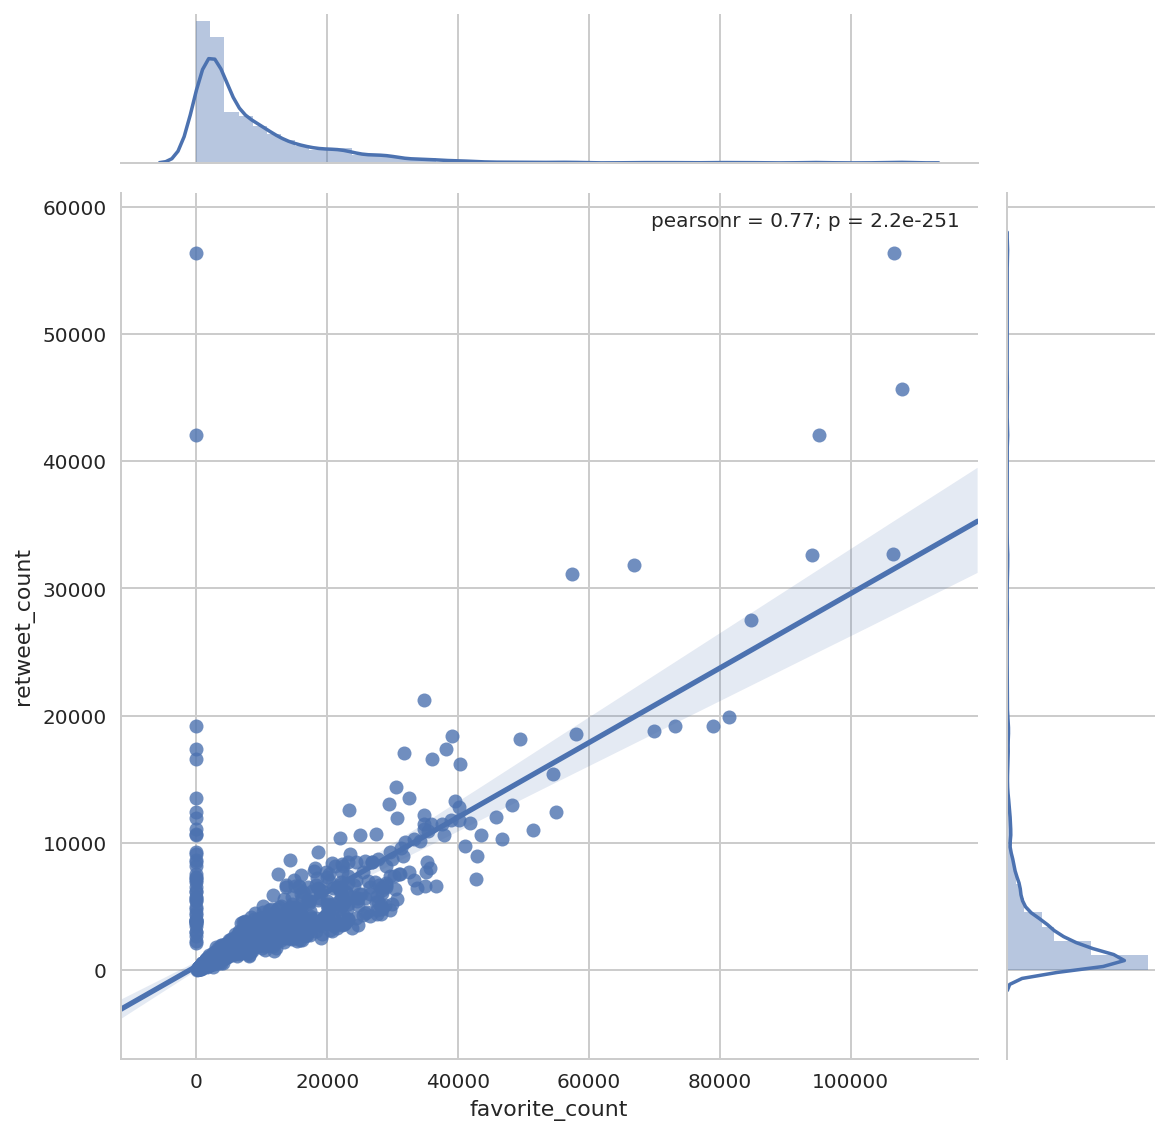

In [201]:
#favorite_count & retweet_count之间关系
f_and_r = sns.jointplot('favorite_count','retweet_count', data = df_twitter_drop,kind = "reg",size = 8)
mod = smf.ols(formula='retweet_count ~ favorite_count', data=df_twitter_drop)
res = mod.fit()
print(res.summary())
#f_and_r = f_and_r.plot(sns.regplot, sns.distplot)
#f_and_r = f_and_r.annotate(f_and_r.pearsonr,rsquare)
#https://blog.csdn.net/ice_martin/article/details/61617053
#http://seaborn.pydata.org/index.html

## 结论2： 最受欢迎的狗狗名字
* 2-1 Tucker、Lucy、Charlie、Cooper、Penny、Oliver是起的最多的Top5名字。

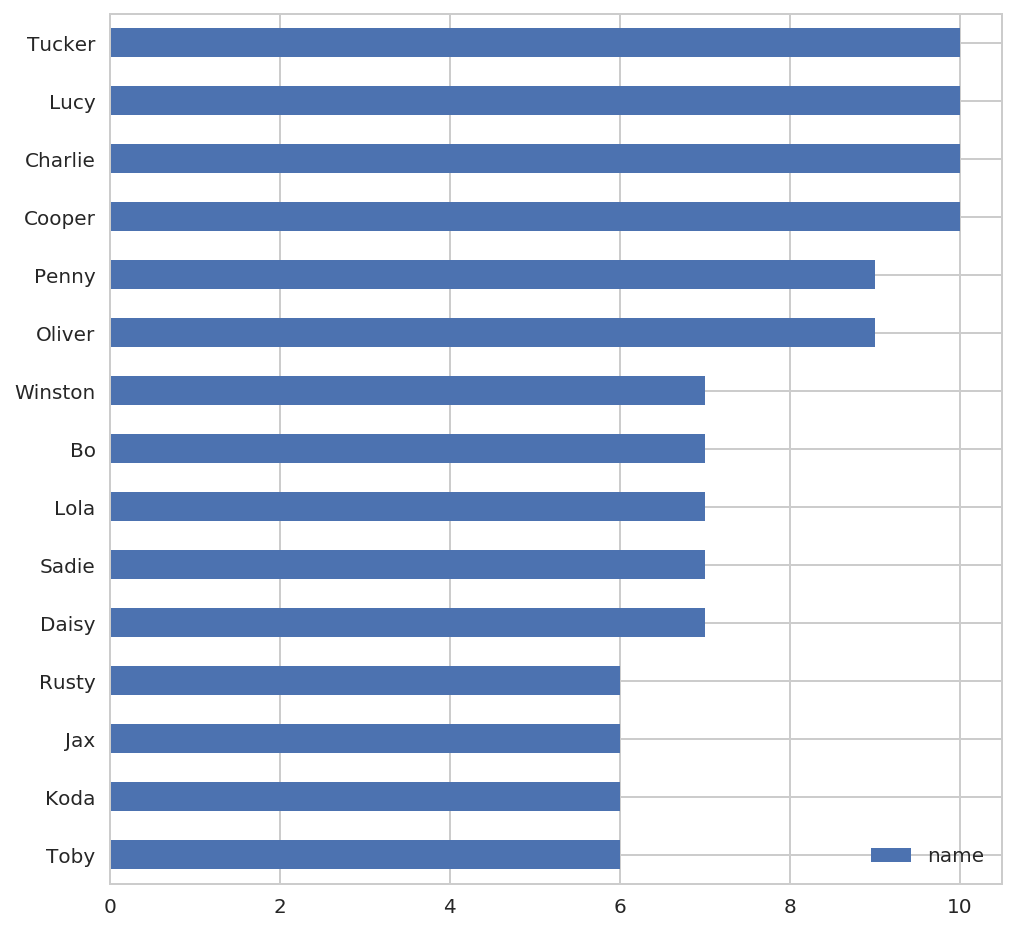

In [202]:
#哪些是大家常取的名字
sns.set(style='whitegrid')
sns_named = pd.DataFrame(df_twitter_drop.name.value_counts().sort_values().tail(15))
sns_named.plot(kind='barh',figsize = (8,8))

## 结论3：哪些品种最受欢迎
* 3-1 Chihuahua作为最受欢迎的品种位列评论数第一，但是其评分比较分散，喜欢的人很喜欢，不喜欢的人也很不喜欢，以至于其得分均值并不高
* 3-2 French Bulldog（法国斗牛犬）和Chow（狮子狗）是评分均值最高的品种
* 3-3 可以看到总体上讲养的越多的品种得分越趋向于较高得分

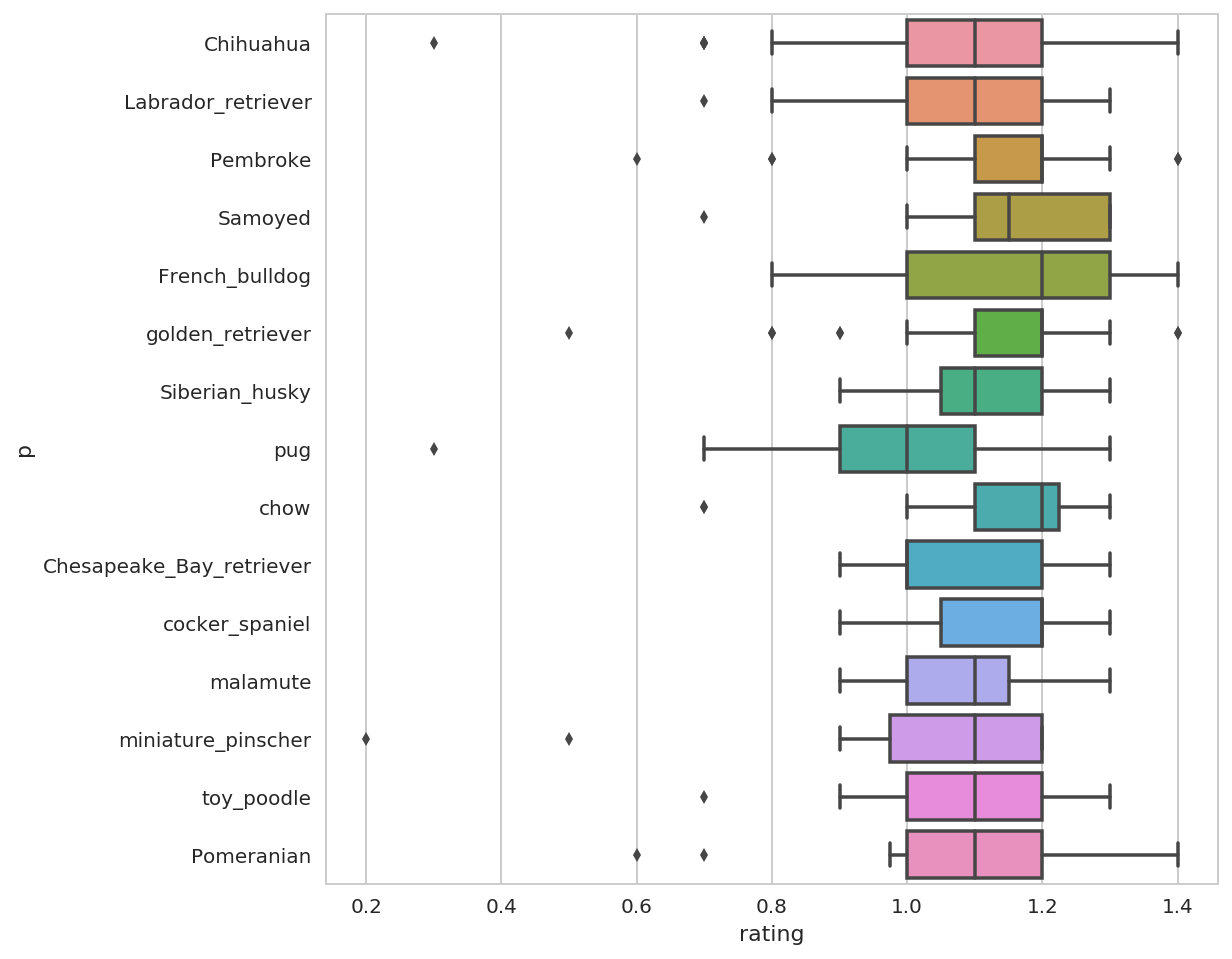

In [183]:
sns_p = pd.DataFrame(df_twitter_drop.p.value_counts().sort_values().tail(15))
df_p = df_twitter_drop[df_twitter_drop.p.isin(sns_p.index)]
plt.subplots(figsize=(8, 8))
sns.boxplot(x='rating',y='p',data = df_p)

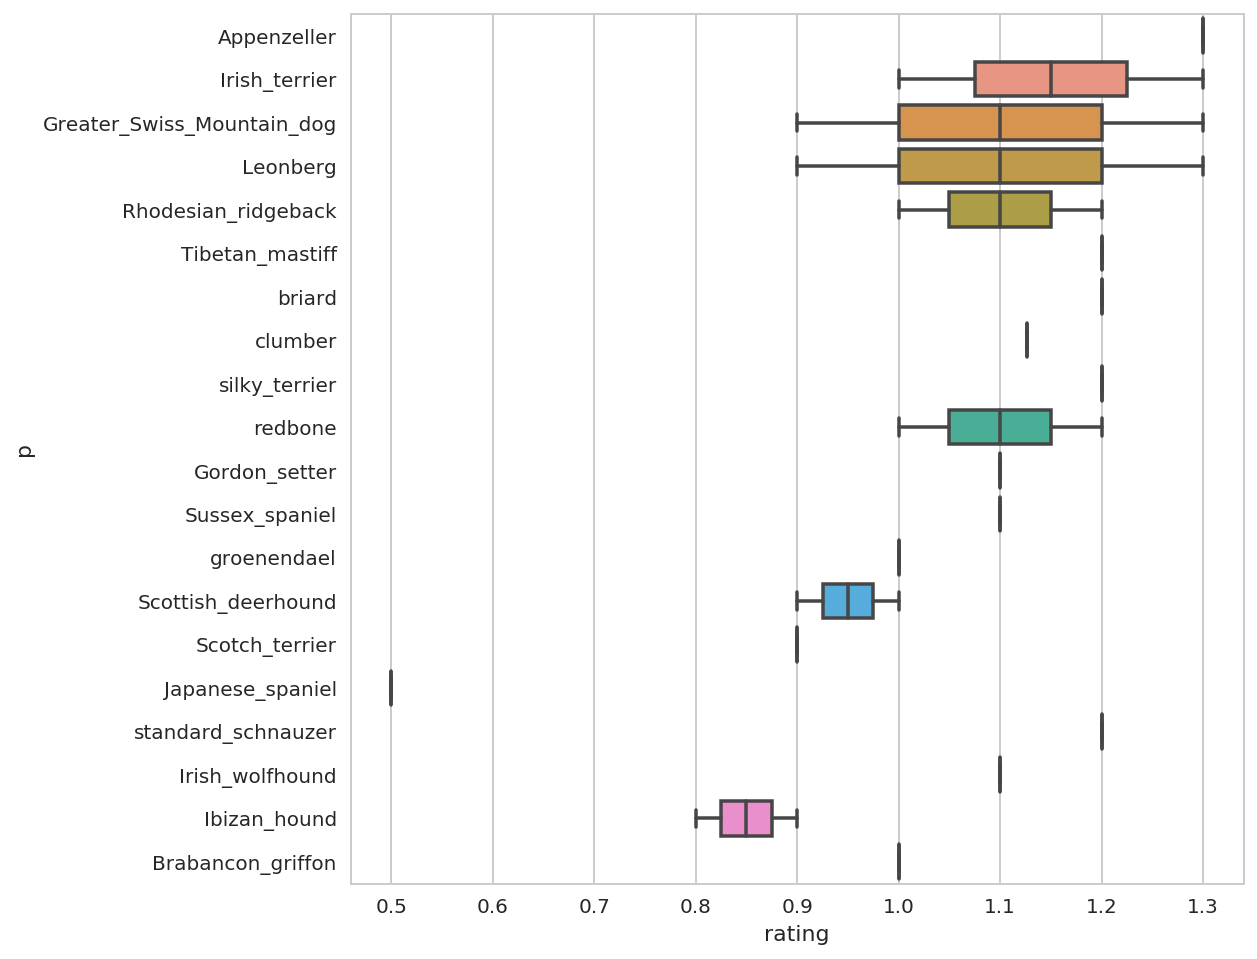

In [184]:
sns_p_2 = pd.DataFrame(df_twitter_drop.p.value_counts().sort_values().head(20))
df_p_2 = df_twitter_drop[df_twitter_drop.p.isin(sns_p_2.index)]
plt.subplots(figsize=(8, 8))
sns.boxplot(x='rating',y='p',data = df_p_2)

## 结论4：
* 4-1 大多数人的评分都集中在1.0~1.2之间。
* 4-2 整体的评分分布是左偏的，评分均值偏高的方向，大家对于狗狗的评分都趋向打高分

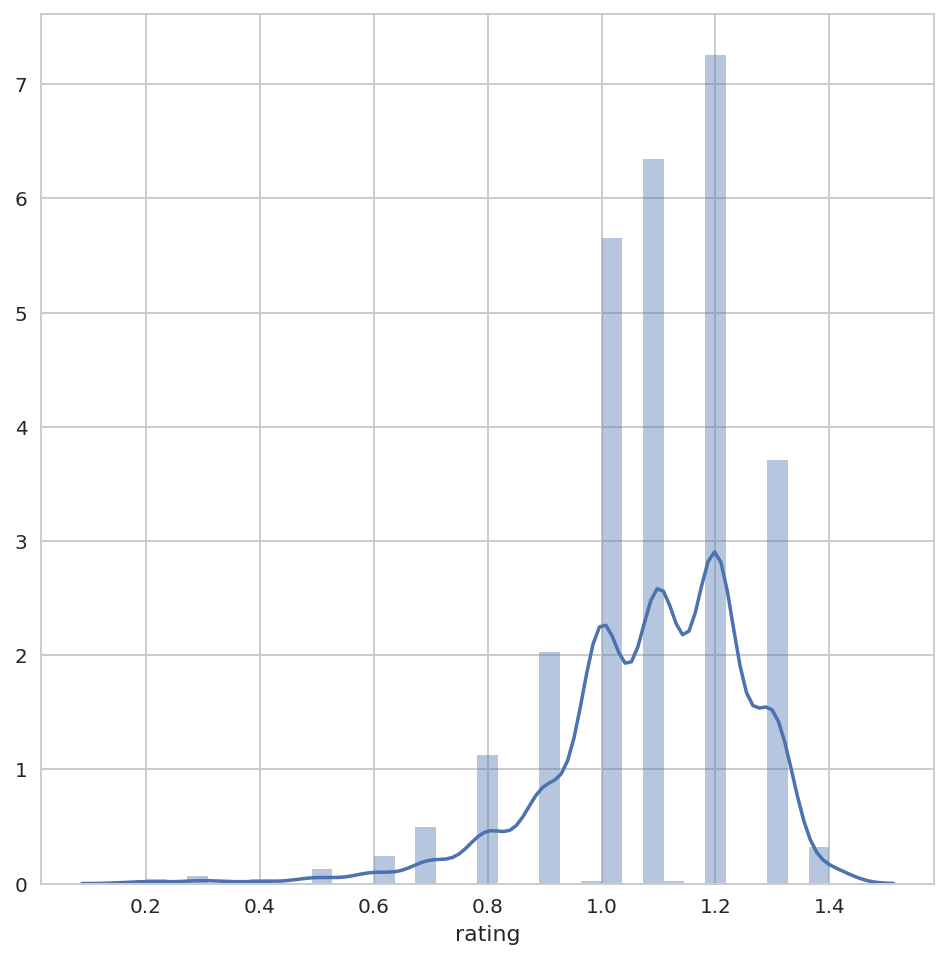

In [182]:
plt.subplots(figsize=(8, 8))
sns_rating = sns.distplot(df_twitter_drop.rating,hist=True,)

## 结论5：
* 5-1 doggo是最受欢迎的狗的地位
* 5-2 pupper是最不受欢迎的狗的地位
* 5-3 而以上两种狗的地位的评分分布都非常的分散

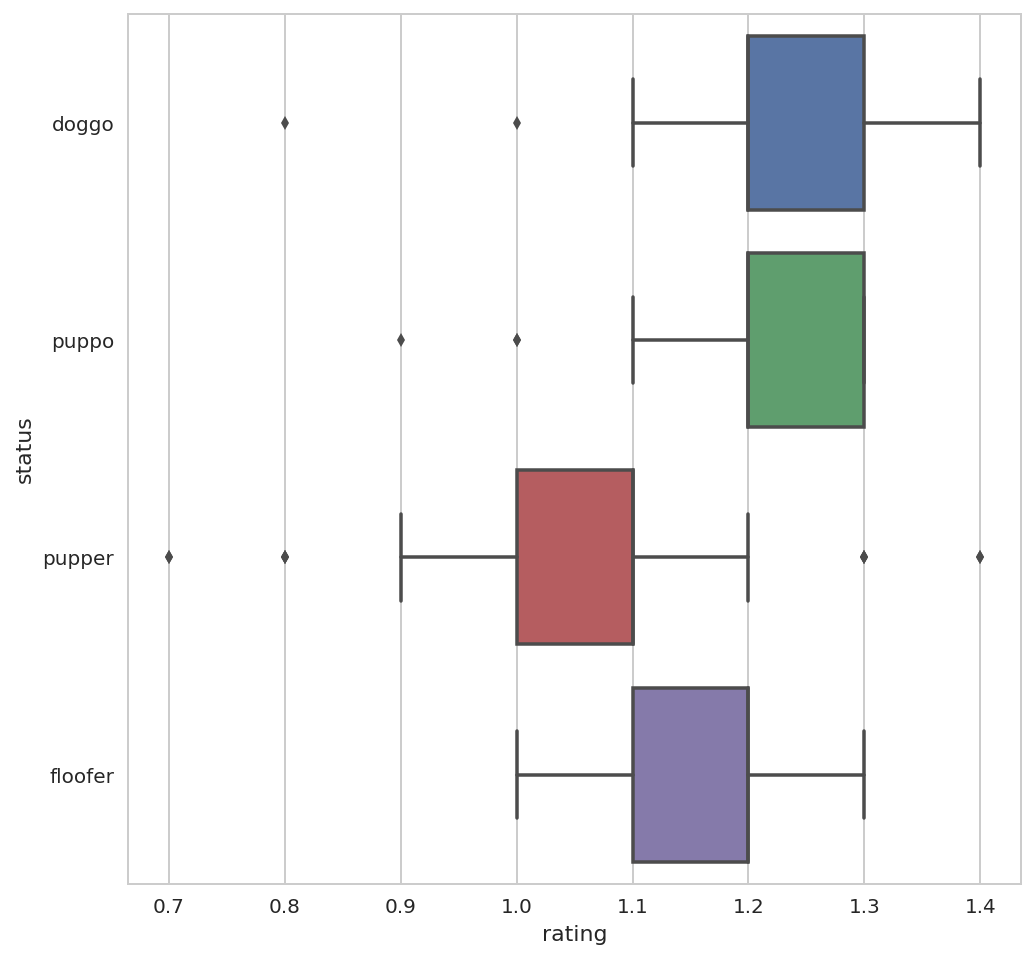

In [191]:
sns_status = pd.DataFrame(df_twitter_drop.status.value_counts().sort_values().head(4))
df_status = df_twitter_drop[df_twitter_drop.status.isin(sns_status.index)]
sns.set(style='whitegrid')
plt.subplots(figsize=(8, 8))
sns.boxplot(x='rating',y='status',data = df_status)